# Dataset Kost Jogja

Dataset ini berisi sekumpulan data ciri-ciri kost di Jogja. Kita diminta untuk mencari model yang akurat untuk bisa memprediksi suatu kost tepat untuk dijadikan kost putra, kost putri, atau kost campuran berdasarkan ciri-ciri yang ada di dataset ini. Adapun ciri-cirinya, diantaranya fac_1, fac_2, fac_3, fac_4, fac_5, fac_6, fac_7, fac_8 (adalah suatu fasilitas tertentu), poi_1, poi_2, poi_3 (jarak antara kost dengan suatu tempat dalam satuan meter), size (ukuran rata-rata kamar di kost), price_monthly (rata-rata harga kost), room_count (jumlah kamar pada kost tersebut), dan total_call (total jumlah kost dikontak).

## A. Import Dataset

In [1]:
# Import library dasar untuk ML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import train dan test data
train = pd.read_csv("train.csv",index_col=0)
test = pd.read_csv("test_data.csv",index_col=0)

# Preview the train data
train.head(5)

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call,gender
id,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1778.0,10038.0,4106.0,9.00,1500000.0,6.0,72,campur
2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,NaN,4548.0,9332.0,6867.0,12.00,1500000.0,30.0,56,campur
3,1.0,NaN,1.0,1.0,1.0,1.0,0.0,1.0,5174.0,9021.0,3693.0,12.00,1600000.0,20.0,109,campur
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1490.0,8954.0,2139.0,8.25,1500000.0,15.0,54,campur
5,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1688.0,8851.0,2145.0,14.85,2100000.0,10.0,19,campur


In [3]:
# Melihat sekilas train data (5 data teratas)
test.head()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call
id,,,,,,,,,,,,,,,
3294,0,1,0,0,0,0,0,1,2634,8854,2007,21.0,700000,1,2
3295,1,1,1,1,1,1,0,1,6569,3512,7341,12.0,1200000,16,30
3296,0,1,1,1,1,0,0,1,10623,883,11250,12.0,700000,8,5
3297,0,1,1,1,1,0,0,1,10592,876,11216,12.0,700000,16,6
3298,0,1,0,0,1,0,0,1,1623,10204,3931,13.6,700000,6,39


Mari kita ekplorasi datasetnya.

In [4]:
# Informasi tipe data setiap kolom
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3293 entries, 1 to 3293
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fac_1          3230 non-null   float64
 1   fac_2          3219 non-null   float64
 2   fac_3          3231 non-null   float64
 3   fac_4          3222 non-null   float64
 4   fac_5          3221 non-null   float64
 5   fac_6          3229 non-null   float64
 6   fac_7          3215 non-null   float64
 7   fac_8          3225 non-null   float64
 8   poi_1          3226 non-null   float64
 9   poi_2          3226 non-null   float64
 10  poi_3          3207 non-null   float64
 11  size           3225 non-null   float64
 12  price_monthly  3208 non-null   float64
 13  room_count     3223 non-null   float64
 14  total_call     3293 non-null   int64  
 15  gender         3293 non-null   object 
dtypes: float64(14), int64(1), object(1)
memory usage: 437.4+ KB


Terdapat 14 kolom bertipe data float, 1 kolom bertipe data integer, dan 1 kolom bertipe data objek (output dari ML).

In [6]:
# Informasi statistika dasar setiap kolom
train.describe()

,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,poi_1,poi_2,poi_3,size,price_monthly,room_count,total_call
count,3230.000000,3219.000000,3231.000000,3222.000000,3221.000000,3229.000000,3215.000000,3225.000000,3226.000000,3226.000000,3207.000000,3225.000000,3.208000e+03,3223.000000,3293.000000
mean,0.261610,0.608263,0.456515,0.562384,0.641416,0.427687,0.004666,0.518450,4679.478921,9920.515189,4906.215778,12.143745,8.975029e+05,10.506050,35.362587
std,0.439579,0.488214,0.498183,0.496170,0.479659,0.494820,0.068156,0.499737,3569.137245,4714.800696,3617.408043,4.951679,6.501208e+05,9.565184,47.269615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2355.500000,7875.750000,2693.000000,9.000000,5.000000e+05,4.000000,8.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3961.000000,9241.000000,3927.000000,12.000000,6.500000e+05,8.000000,20.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5900.750000,12422.750000,6099.000000,12.250000,1.200000e+06,14.000000,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000


## B. Data Cleaning

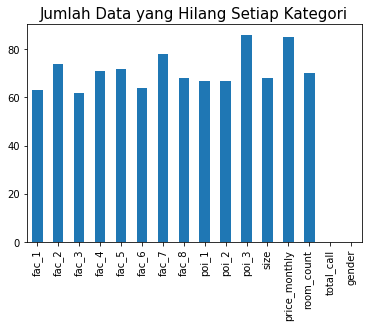

In [11]:
# Perbandingan jumlah null data antar kolom
plt.title('Jumlah Data yang Hilang Setiap Kategori',fontsize=15)
train.isnull().sum().plot.bar()
plt.savefig('Jumlah Data yang Hilang Setiap Kategori.png')

In [8]:
train.isnull().sum()

fac_1            63
fac_2            74
fac_3            62
fac_4            71
fac_5            72
fac_6            64
fac_7            78
fac_8            68
poi_1            67
poi_2            67
poi_3            86
size             68
price_monthly    85
room_count       70
total_call        0
gender            0
dtype: int64

In [155]:
print('Percent of missing "fac_1" records is %.2f%%' %((train['fac_1'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_2" records is %.2f%%' %((train['fac_2'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_3" records is %.2f%%' %((train['fac_3'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_4" records is %.2f%%' %((train['fac_4'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_5" records is %.2f%%' %((train['fac_5'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_6" records is %.2f%%' %((train['fac_6'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_7" records is %.2f%%' %((train['fac_7'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "fac_8" records is %.2f%%' %((train['fac_8'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "poi_1" records is %.2f%%' %((train['poi_1'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "poi_2" records is %.2f%%' %((train['poi_2'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "poi_3" records is %.2f%%' %((train['poi_3'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "size" records is %.2f%%' %((train['size'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "price_monthly" records is %.2f%%' %((train['price_monthly'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "room_count" records is %.2f%%' %((train['room_count'].isnull().sum()/train.shape[0])*100))
print('Percent of missing "total_call" records is %.2f%%' %((train['total_call'].isnull().sum()/train.shape[0])*100))

Percent of missing "fac_1" records is 1.91%
Percent of missing "fac_2" records is 2.25%
Percent of missing "fac_3" records is 1.88%
Percent of missing "fac_4" records is 2.16%
Percent of missing "fac_5" records is 2.19%
Percent of missing "fac_6" records is 1.94%
Percent of missing "fac_7" records is 2.37%
Percent of missing "fac_8" records is 2.06%
Percent of missing "poi_1" records is 2.03%
Percent of missing "poi_2" records is 2.03%
Percent of missing "poi_3" records is 2.61%
Percent of missing "size" records is 2.06%
Percent of missing "price_monthly" records is 2.58%
Percent of missing "room_count" records is 2.13%
Percent of missing "total_call" records is 0.00%


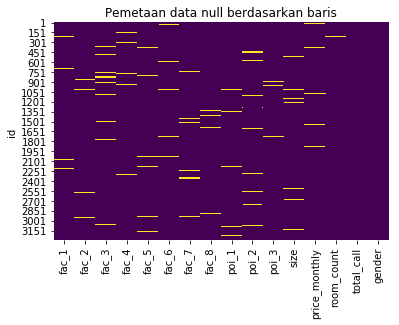

In [12]:
# Pemetaan data hilang berdasarkan baris
plt.title("Pemetaan data null berdasarkan baris")
sns.heatmap(data=train.isnull(),cbar=False,cmap='viridis')
plt.savefig('Pemetaan data yang hilang.png')

Terlihat setiap kolom masih memiliki data yang null. Maka dari itu perlu melakukan analisis setiap kolom untuk menentukan cara cleaning data.

In [37]:
# Meng-copy dataset ke variabel baru agar variabel lama tetap ada variabel yang datanya belum diubah
train_data = train.copy()

# Split data berdasarkan gender
dfputra = train_data[train_data['gender']=='putra'].copy()
dfputri = train_data[train_data['gender']=='putri'].copy()
dfcampur = train_data[train_data['gender']=='campur'].copy()

## Facilities

## 1. Fac_1

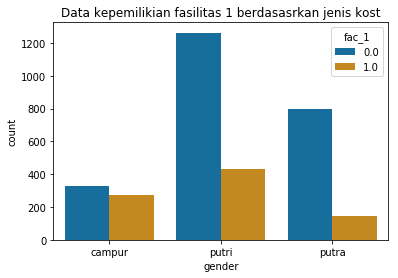

In [38]:
plt.title ("Data kepemilikian fasilitas 1 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_1',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 1.png')

Ternyata setiap jenis kost mayoritas tidak memiliki fasilitas 1. Maka dari itu, kolom ini bisa di-drop karena tidak memberikan informasi yang signifikan untuk membedakan jenis kost. Tetapi kita bisa mengisi null data dengan 0

In [39]:
def impute_fac1(cols):
    fac_1 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_1):
        return 0
    else:
        return fac_1
train_data['fac_1'] = train_data[['fac_1','gender']].apply(impute_fac1,axis=1)

## 2. Fac_2

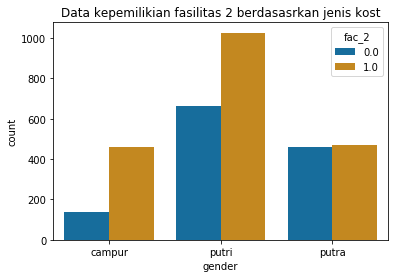

In [40]:
plt.title ("Data kepemilikian fasilitas 2 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_2',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 2.png')

Sama seperti fac_1, fac_2 juga bisa di-drop. Tetapi kita bisa mengisi null data di fac_2 dengan 1.

In [41]:
def impute_fac2(cols):
    fac_2 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_2):
        return 1
    else:
        return fac_2
train_data['fac_2'] = train_data[['fac_2','gender']].apply(impute_fac2,axis=1)

## 3. Fac_3

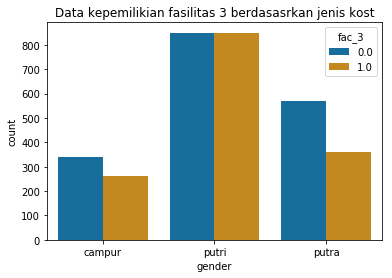

In [111]:
plt.title ("Data kepemilikian fasilitas 3 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_3',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 3.png')

Sama seperti sebelumnya, fac_3 bisa di-drop dimana kita bisa mengisi null data dengan 0.

In [43]:
def impute_fac3(cols):
    fac_3 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_3):
        return 0
    else:
        return fac_3
train_data['fac_3'] = train_data[['fac_3','gender']].apply(impute_fac3,axis=1)

## 4. Fac_4

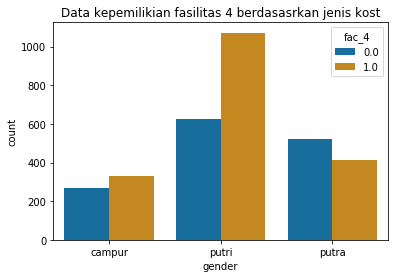

In [112]:
plt.title ("Data kepemilikian fasilitas 4 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_4',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 4.png')

Berbeda dengan sebelumnya, fac_4 menjadi ciri yang mempengaruhi penentuan jenis kost. Sesuai data di atas, kost putra mayoritas tidak memiliki fac_4, berbeda dengan dua jenis kost lainnya. Sehingga kita bisa mengisi null data dengan 0 untuk gender putra dan 1 untuk gender putri serta campur.

In [45]:
def impute_fac4(cols):
    fac_4 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_4):
        if gender == 'putra':
            return 0
        else:
            return 1
    else:
        return fac_4

In [46]:
train_data['fac_4'] = train_data[['fac_4','gender']].apply(impute_fac4,axis=1)

## 5. Fac_5

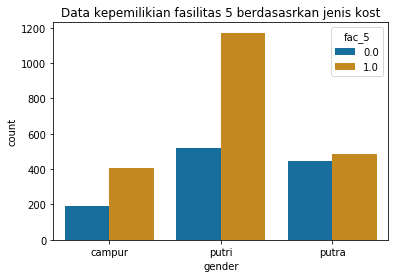

In [113]:
plt.title ("Data kepemilikian fasilitas 5 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_5',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 5.png')

Sama seperti fac_1, fac_2, dan fac_3, fac_5 bisa di-drop dimana kita bisa mengisi null data dengan 1.

In [48]:
def impute_fac5(cols):
    fac_5 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_5):
        return 1
    else:
        return fac_5
train_data['fac_5'] = train_data[['fac_5','gender']].apply(impute_fac5,axis=1)

## 6. Fac_6

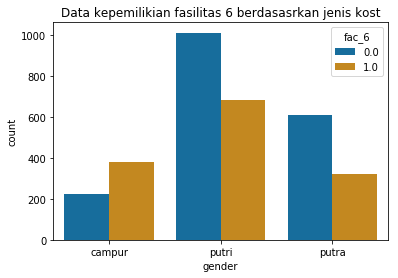

In [114]:
plt.title ("Data kepemilikian fasilitas 6 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_6',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 6.png')

Layaknya fac_4, fac_6 juga menjadi ciri yang mempengaruhi penentuan jenis kost. Sesuai data di atas, kost campur mayoritas memiliki fac_6, berbeda dengan dua jenis kost lainnya. Sehingga kita bisa mengisi null data dengan 1 untuk gender campur dan 0 untuk gender putra serta putri.

In [50]:
def impute_fac6(cols):
    fac_6 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_6):
        if gender == 'campur':
            return 1
        else:
            return 0
    else:
        return fac_6

In [51]:
train_data['fac_6'] = train_data[['fac_6','gender']].apply(impute_fac6,axis=1)

## 7. Fac_7

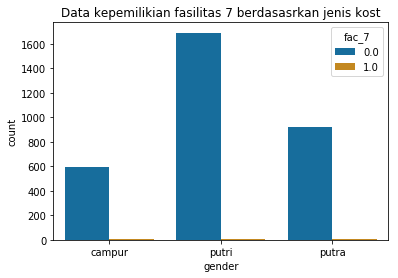

In [115]:
plt.title ("Data kepemilikian fasilitas 7 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_7',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 7.png')

Kolom ini sama sekali tidak memberitahu informasi apapun selain keseluruhan kost tidak memiliki fac_7, maka dari itu kita dapat drop kolom ini. Kita bisa mengisi null data dengan nilai 0.

In [53]:
def impute_fac7(cols):
    fac_7 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_7):
        return 0
    else:
        return fac_7
    
train_data['fac_7'] = train_data[['fac_7','gender']].apply(impute_fac7,axis=1)

## 8. Fac_8

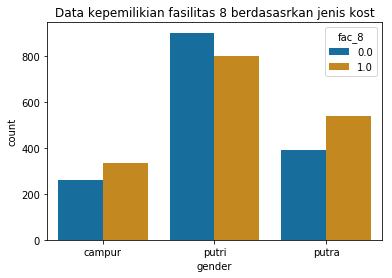

In [116]:
plt.title ("Data kepemilikian fasilitas 8 berdasasrkan jenis kost")
sns.countplot(x='gender',hue='fac_8',data=train,palette='colorblind')
plt.savefig('kepemilikian fasilitas 8.png')

Sama seperti fac_4 dan fac_6, fac_8 juga menjadi ciri yang mempengaruhi penentuan jenis kost. Sesuai data di atas, kost putri mayoritas memiliki fac_8, berbeda dengan dua jenis kost lainnya. Sehingga kita bisa mengisi null data dengan 0 untuk gender putri dan 1 untuk gender putra serta campur.

In [55]:
def impute_fac8(cols):
    fac_8 = cols[0]
    gender = cols[1]
    
    if pd.isnull(fac_8):
        if gender == 'putri':
            return 0
        else:
            return 1
    else:
        return fac_8

In [56]:
train_data['fac_8'] = train_data[['fac_8','gender']].apply(impute_fac8,axis=1)

## POI (Point of Interest)

Merupakan jarak dari kost ke suatu tempat. Data null bisa diisi dengan nilai median masing-masing gender agar tidak mengubah grafik data.

## 9. poi_1

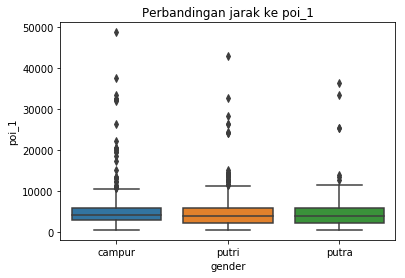

In [117]:
plt.title("Perbandingan jarak ke poi_1")
sns.boxplot(x='gender',y='poi_1',data=train)
plt.savefig('Perbandingan jarak ke poi_1.png')

In [63]:
# Median poi_1
print('The median of poi_1')
print('The median of "poi_1" putra is %.2f meter' %(dfputra["poi_1"].median(skipna=True)))
print('The median of "poi_1" putri is %.2f meter' %(dfputri["poi_1"].median(skipna=True)))
print('The median of "poi_1" campur is %.2f meter' %(dfcampur["poi_1"].median(skipna=True)))

The median of poi_1
The median of "poi_1" putra is 3986.00 meter
The median of "poi_1" putri is 3903.00 meter
The median of "poi_1" campur is 4067.00 meter


In [64]:
def impute_poi1(cols):
    poi_1 = cols[0]
    gender = cols[1]
    
    if pd.isnull(poi_1):
        if gender == 'putra':
            return train[train['gender']=='putra']['poi_1'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['poi_1'].median()
        else:
            return train[train['gender']=='campur']['poi_1'].median()
    else:
        return poi_1
train_data['poi_1'] = train[['poi_1','gender']].apply(impute_poi1,axis=1)

## 10. poi_2

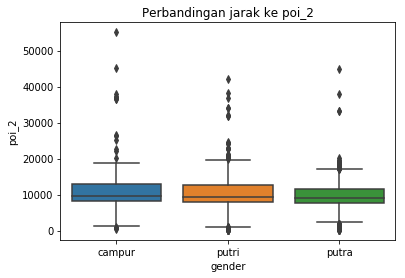

In [118]:
plt.title("Perbandingan jarak ke poi_2")
sns.boxplot(x='gender',y='poi_2',data=train)
plt.savefig('Perbandingan jarak ke poi_2.png')

In [66]:
# Median poi_2
print('The median of poi_2')
print('The median of "poi_2" putra is %.2f meter' %(dfputra["poi_2"].median(skipna=True)))
print('The median of "poi_2" putri is %.2f meter' %(dfputri["poi_2"].median(skipna=True)))
print('The median of "poi_2" campur is %.2f meter' %(dfcampur["poi_2"].median(skipna=True)))

The median of poi_2
The median of "poi_2" putra is 9153.00 meter
The median of "poi_2" putri is 9266.00 meter
The median of "poi_2" campur is 9533.00 meter


In [67]:
def impute_poi2(cols):
    poi_2 = cols[0]
    gender = cols[1]
    
    if pd.isnull(poi_2):
        if gender == 'putra':
            return train[train['gender']=='putra']['poi_2'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['poi_2'].median()
        else:
            return train[train['gender']=='campur']['poi_2'].median()
    else:
        return poi_2
train_data['poi_2'] = train[['poi_2','gender']].apply(impute_poi2,axis=1)

## 11. poi_3

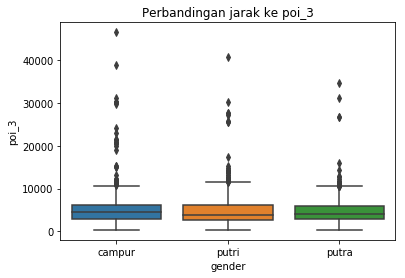

In [119]:
plt.title("Perbandingan jarak ke poi_3")
sns.boxplot(x='gender',y='poi_3',data=train)
plt.savefig('Perbandingan jarak ke poi_3.png')

In [69]:
# Median poi_3
print('The median of poi_3')
print('The median of "poi_3" putra is %.2f meter' %(dfputra["poi_3"].median(skipna=True)))
print('The median of "poi_3" putri is %.2f meter' %(dfputri["poi_3"].median(skipna=True)))
print('The median of "poi_3" campur is %.2f meter' %(dfcampur["poi_3"].median(skipna=True)))

The median of poi_3
The median of "poi_3" putra is 3928.50 meter
The median of "poi_3" putri is 3724.00 meter
The median of "poi_3" campur is 4418.00 meter


In [70]:
def impute_poi3(cols):
    poi_3 = cols[0]
    gender = cols[1]
    
    if pd.isnull(poi_3):
        if gender == 'putra':
            return train[train['gender']=='putra']['poi_3'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['poi_3'].median()
        else:
            return train[train['gender']=='campur']['poi_3'].median()
    else:
        return poi_3
train_data['poi_3'] = train[['poi_3','gender']].apply(impute_poi3,axis=1)

## 12. Size

Menggambarkan rata-rata luas kamar pada kost. Sama sepert poi, kita bisa mengisi null data dengan median.

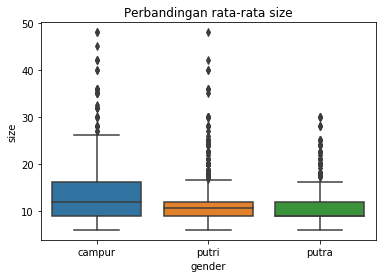

In [129]:
plt.title("Perbandingan rata-rata size")
sns.boxplot(x='gender',y='size',data=train)
plt.savefig('Perbandingan rata-rata size.png')

Kost campur memiliki kecenderungan memiliki ukuran kamar yang lebih luas. Sedangkan luas kamar putra maupun putri tidak berbeda begitu signifikan.

In [72]:
# median size
print('The median of "size" putra is %.2f meter square' %(dfputra["size"].median(skipna=True)))
print('The median of "size" putri is %.2f meter square' %(dfputri["size"].median(skipna=True)))
print('The median of "size" campur is %.2f meter square' %(dfcampur["size"].median(skipna=True)))

The median of "size" putra is 9.00 meter square
The median of "size" putri is 10.68 meter square
The median of "size" campur is 12.00 meter square


In [73]:
def impute_size(cols):
    size = cols[0]
    gender = cols[1]
    
    if pd.isnull(size):
        if gender == 'putra':
            return train[train['gender']=='putra']['size'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['size'].median()
        else:
            return train[train['gender']=='campur']['size'].median()
    else:
        return size

In [74]:
train_data['size'] = train[['size','gender']].apply(impute_size,axis=1)

## 13. Price_monthly

Menggambarkan rata-rata harga kamar per kost. Sama sepert poi, kita bisa mengisi null data dengan median.

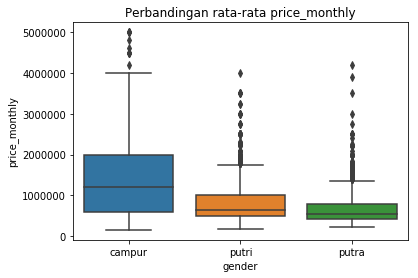

In [128]:
plt.title("Perbandingan rata-rata price_monthly")
sns.boxplot(x='gender',y='price_monthly',data=train)
plt.savefig('Perbandingan rata-rata price_monthly.png')

In [76]:
# median price_monthly
print('The median of "price_monthly" putra is Rp.%.2f' %(dfputra["price_monthly"].median(skipna=True)))
print('The median of "price_monthly" putri is Rp.%.2f' %(dfputri["price_monthly"].median(skipna=True)))
print('The median of "price_monthly" campur is Rp.%.2f' %(dfcampur["price_monthly"].median(skipna=True)))

The median of "price_monthly" putra is Rp.550000.00
The median of "price_monthly" putri is Rp.650000.00
The median of "price_monthly" campur is Rp.1200000.00


Kost campur memiliki kecenderungan memiliki harga kamar yang paling mahal dari jenis kost lain. Selain itu harga kost putri juga cenderung lebih mahal dari harga kost putra.

In [77]:
def impute_price(cols):
    price_monthly = cols[0]
    gender = cols[1]
    
    if pd.isnull(price_monthly):
        if gender == 'putra':
            return train[train['gender']=='putra']['price_monthly'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['price_monthly'].median()
        else:
            return train[train['gender']=='campur']['price_monthly'].median()
    else:
        return price_monthly

In [78]:
train_data['price_monthly'] = train[['price_monthly','gender']].apply(impute_price,axis=1)

## 14. Room_count

Menggambarkan rata-rata jumlah kamar per kost. Sama sepert poi, kita bisa mengisi null data dengan median.

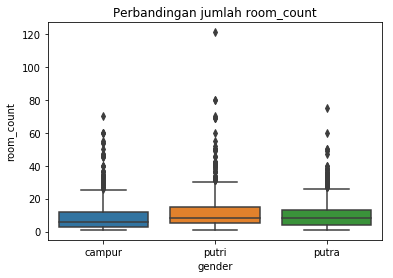

In [127]:
plt.title("Perbandingan jumlah room_count")
sns.boxplot(x='gender',y='room_count',data=train)
plt.savefig('Perbandingan jumlah room_count.png')

In [80]:
# median room_count
print('The median of "room_count" putra is %.2f' %(dfputra["room_count"].median(skipna=True)))
print('The median of "room_count" putri is %.2f' %(dfputri["room_count"].median(skipna=True)))
print('The median of "room_count" campur is %.2f' %(dfcampur["room_count"].median(skipna=True)))

The median of "room_count" putra is 8.00
The median of "room_count" putri is 8.00
The median of "room_count" campur is 6.00


Kost putri memiliki kecenderungan memiliki jumlah kamar yang paling banyak. Sedangkan jumlah kamar putra cenderung lebih banyak daripada kost campur.

In [81]:
def impute_room(cols):
    room_count = cols[0]
    gender = cols[1]
    
    if pd.isnull(room_count):
        if gender == 'putra':
            return train[train['gender']=='putra']['room_count'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['room_count'].median()
        else:
            return train[train['gender']=='campur']['room_count'].median()
    else:
        return room_count

In [82]:
train_data['room_count'] = train[['room_count','gender']].apply(impute_room,axis=1)

## 15. Total_call

Menggambarkan jumlah kost dihubungi oleh calon penyewa. Sama sepert poi, kita bisa mengisi null data dengan median.

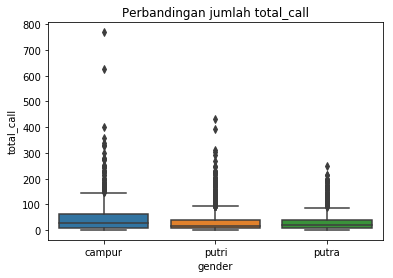

In [126]:
plt.title("Perbandingan jumlah total_call")
sns.boxplot(x='gender',y='total_call',data=train)
plt.savefig('Perbandingan jumlah total_call.png')

In [84]:
# median total_call
print('The median of "total_call" putra is %.2f' %(dfputra["total_call"].median(skipna=True)))
print('The median of "total_call" putri is %.2f' %(dfputri["total_call"].median(skipna=True)))
print('The median of "total_call" campur is %.2f' %(dfcampur["total_call"].median(skipna=True)))

The median of "total_call" putra is 21.00
The median of "total_call" putri is 18.00
The median of "total_call" campur is 28.00


Kost campur memiliki kecenderungan dihubungi oleh calon penyewa lebih sering. Sedangkan jumlah total_call putra maupun putri tidak berbeda begitu signifikan.

In [85]:
def impute_call(cols):
    total_call = cols[0]
    gender = cols[1]
    
    if pd.isnull(total_call):
        if gender == 'putra':
            return train[train['gender']=='putra']['total_call'].median()
        elif gender == 'putri':
            return train[train['gender']=='putri']['total_call'].median()
        else:
            return train[train['gender']=='campur']['total_call'].median()
    else:
        return total_call

In [86]:
train_data['total_call'] = train[['total_call','gender']].apply(impute_call,axis=1)

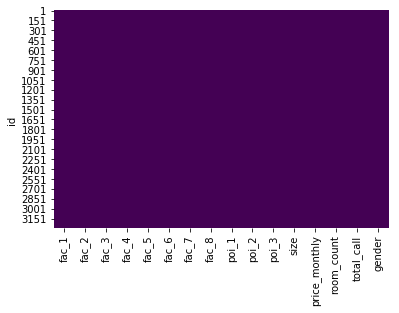

In [89]:
sns.heatmap(data=train_data.isnull(),cbar=False,cmap='viridis')

Mari kita melihat korelasi antar kolom.

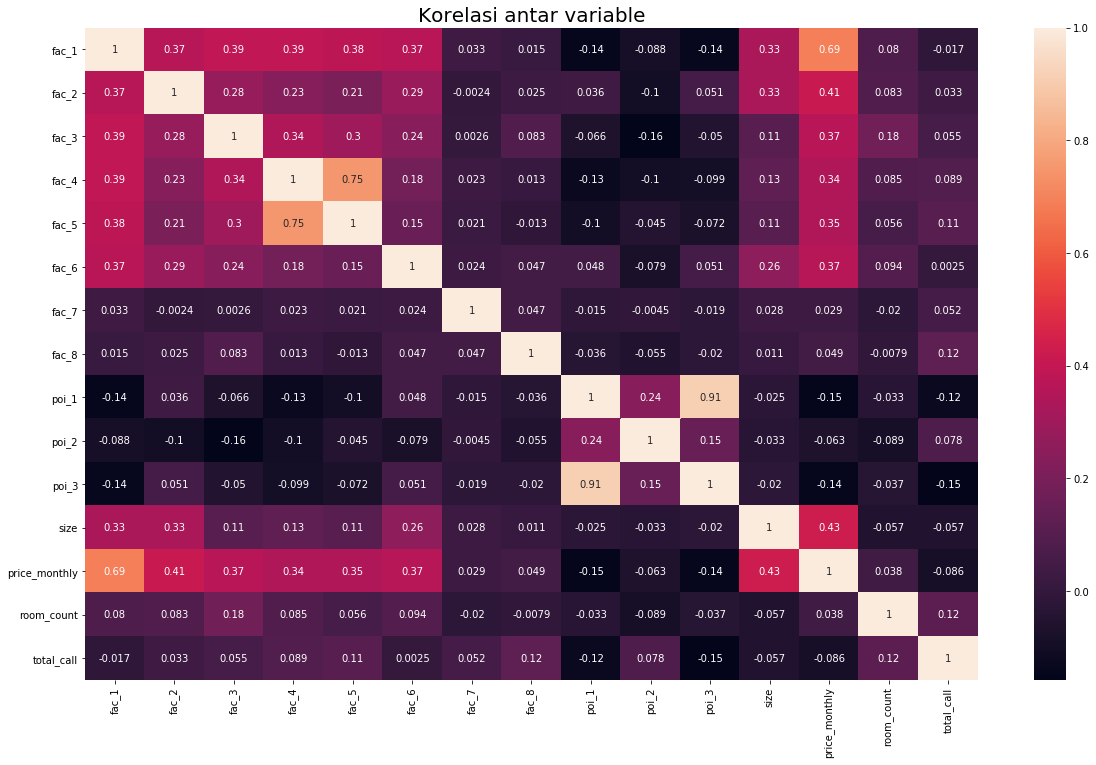

In [132]:
plt.figure(figsize=(20,12))
plt.title("Korelasi antar variable",size=20)
sns.heatmap(train_data.corr(),annot=True)
plt.savefig('Korelasi antar variabel.png')

Terlihat ada 3 hubungan yang menunjukkan multicolinearitas, diantaranya:
1. price_monthly dan fac_1, artinya jika suatu kost memiliki fac_1 kemungkinan harga sewa perbulannya akan lebih mahal. Mungkin fac_1 bisa seperti fasilitas AC karena harga listriknya pasti lebih mahal.
2. fac_4 dan fac_5, artinya jika suatu kost ada fac_4 kemungkinan besar kost itu juga punya fac_5. Mungkin bisa seperti kasur dan lemari, biasanya kost yang kosongan pasti tidak memiliki keduanya begitu pula sebaliknya.
3. poi_1 dan poi_3, artinya jarak antara poi_1 dan 3 sangat dekat. Karena semakin jauh jarak kost ke poi_1, maka kemungkinan besar jarak kost ke poi_3 juga jauh.

## C. Data Manipulation dan Machine Learning

Berdasarkan analisis di atas, berarti dapat kita simpulkan ada beberapa kolom yang di-drop, diantaranya fac_1, fac_2, fac_3, fac_5, dan fac_7. Pada kasus ini penulis menggunakan algoritma random forest classifier.

In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
from sklearn.model_selection import train_test_split

# Rasio perbandingan train data dan test data dari dataset data train adalah 3:1 (75%:25%)
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(labels=['gender','fac_1','fac_2','fac_3','fac_5','fac_7'],axis=1), train_data['gender'], test_size=0.3, random_state=101)

# Pembuatan model berdasarkan train data
rfc.fit(X_train,y_train)

# Nilai prediksi dari model
rfc_pred = rfc.predict(X_test)

# Pembuatan matrix
from sklearn.metrics import classification_report,confusion_matrix
print('Confussion Matrix')
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print('Classification Matrix')
print(classification_report(y_test,rfc_pred))

Confussion Matrix
[[ 98  25  62]
 [ 21 123 140]
 [ 41 115 363]]


Classification Matrix
              precision    recall  f1-score   support

      campur       0.61      0.53      0.57       185
       putra       0.47      0.43      0.45       284
       putri       0.64      0.70      0.67       519

    accuracy                           0.59       988
   macro avg       0.57      0.55      0.56       988
weighted avg       0.59      0.59      0.59       988



Terlihat dari matrix di atas, akurasi dari model adalah 59%. Tetapi kita perlu melakukan validasi menggukan K-Fold Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score
X = train_data.drop(labels=['gender','fac_1','fac_2','fac_3','fac_5','fac_7'],axis=1)
y = train_data['gender']
print(cross_val_score(rfc, X, y, cv=5))
print("Rata-rata akurasi: %.2f" %(cross_val_score(rfc, X, y, cv=8).mean()))

[0.56449165 0.57207891 0.51745068 0.52959029 0.50684932]
Rata-rata akurasi: 0.55


In [103]:
X_result = test.drop(labels=['fac_1','fac_2','fac_3','fac_5','fac_7'],axis=1)

In [105]:
y_result = rfc.predict(X_result)

In [108]:
result = X_result.copy()
result['gender'] = y_result

In [109]:
submission = pd.DataFrame({'id':X_result.index,'gender':y_result})
submission.to_csv('Prediction.csv',index=False)

In [110]:
submission.head()

,id,gender
0,3294,putri
1,3295,campur
2,3296,putri
3,3297,putri
4,3298,putra
